# FDA Project - Yalini Brhanavan

This project has the following sections : 
1. Read data from the flat file powerproduction.txt
1. Performs a simple linear regression to analyse the relationship between Wind Speed and Power Production
1. Explores other regression model to see if the predictive power could be improved

## 1. Read Data

####  References: 

* [Pandas- read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
* [Geek for geeks - using pandas.read_csv](https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read Power production data file using Pandas
df_power = pd.read_csv('powerproduction.txt')

In [3]:
# Examine the head of the dataframe
df_power.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [4]:
# check Pandas has read the data as floating numbers
df_power.dtypes

speed    float64
power    float64
dtype: object

The datatype of both speed and power are floating numbers. So this looks correct.

## 2. Simple Linear Regression Using Numpy Plotfit

References : 
* [Pandas to_numpy() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html)
* [FDA Lectures-Topic 9 Fitting Lines](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/fitting-lines.ipynb)
* [FDA Lecture-Topic 9 Simple Linear Regression](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb)

Simple linear regression are of the form y = m x + c

In [5]:
# define X and y values
x = df_power[['speed']].to_numpy() 
y = df_power[['power']].to_numpy() 

In [6]:
# Examine the shape of x and y the variables 
print(x.shape)
print(y.shape)

(500, 1)
(500, 1)


In [7]:
# numpy ployfit function expects the variables to 1D arrays. Turn these x and y variables into 1D array
x = x.reshape(-1)
y = y.reshape(-1)
print(x.shape)
print(y.shape)

(500,)
(500,)


Now x and y are 1-D arrays so can be used with numpy's plotfit function

In [8]:
coeffs = np.polyfit(x, y, 1)
coeffs

array([  4.91759567, -13.89990263])

Here 4.917 is the gradiant and -13.899 is the intercept . Therefore the predicted value of y is given by the formola 
<code> y_hat = coeffs[0] * x + coeffs[-1] </code>

In [9]:
# calculate y_values given by the linear model
y_hat = coeffs[0] * x + coeffs[1]

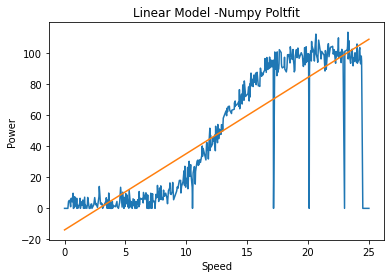

In [10]:
plt.plot(x, y)
plt.plot(x, y_hat)
plt.xlabel('Speed')
plt.ylabel('Power')
plt.title('Linear Model -Numpy Poltfit')
plt.show()

## 3. Simple Linear Regression Using Scikit Learn 

References : 
* [Scikit Learn Linear Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [Datacamp - Essentials of Linear Regression in Python](https://www.datacamp.com/community/tutorials/essentials-linear-regression-python)

In [11]:
# import LinearRegression model from Scikit Learn linear models
from sklearn.linear_model import LinearRegression

In [12]:
# define x and y variables
x = df_power[['speed']].to_numpy() 
y = df_power[['power']].to_numpy() 

In [13]:
# create a new linear model
model = LinearRegression()

In [14]:
#fit the data to the model
model.fit(x,y)

LinearRegression()

In [15]:
# Model coefficent
model.coef_

array([[4.91759567]])

This is the exact same value as the one obtained using numpy polyfit

In [16]:
# intercept 
model.intercept_

array([-13.89990263])

This is also the exact same value as the one obtained using numpy polyfit

In [17]:
# predict y values using the scikit learn linear model
y_pred = model.predict(x)

In [18]:
# R-square of the model
model.score(x,y)

0.7289360258564073

The model achieved an R-squared value of 0.73, this suggests the relationship is reasonably strong.

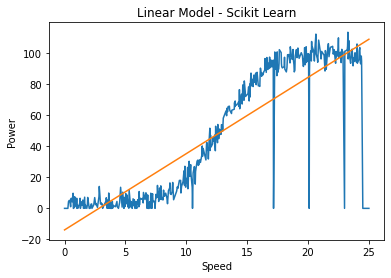

In [19]:
plt.plot(x, y)
plt.plot(x, y_pred)
plt.title('Linear Model - Scikit Learn')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

**Conclusion** <br/>
Both these methods essentially produced the same linear relationship using both Numpy plotfit and Scikit Learns Linear model. 

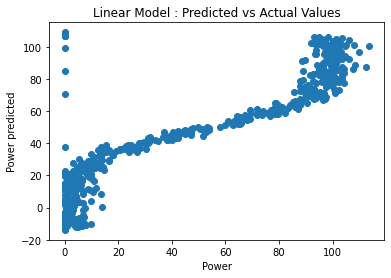

In [20]:
plt.scatter(y, y_pred)
plt.xlabel('Power')
plt.ylabel('Power predicted')
plt.title('Linear Model : Predicted vs Actual Values')
plt.show()

The scatterplot of predicted power values and actual values shows the model is good fit between when power values are between 20 and 80. This is because the linear relationship speed and power breaksdown when the speed is less than 10 or speed is over 20. <br/>

Because the linear model is not a great fit , next I will try fitting a higher order polynomial.

## 4. Fit a third degree polynomial using Numpy Plotfit 

In [21]:
# define X and y values
x = df_power[['speed']].to_numpy() 
y = df_power[['power']].to_numpy() 
x = x.reshape(-1)
y = y.reshape(-1)

In [22]:
# fit a 3rd degree polynomical 
coeffs2 = np.polyfit(x, y, 3)

In [23]:
# print the coefficents of the polyfit
coeffs2

array([ -0.05241927,   1.89485751, -12.94285866,  19.20130246])

Here the coefficents are X^3, X^2, X and constant

In [24]:
# calculate the predicted y values of using the coefficents of the polyfit
y_third = coeffs2[0] * x * x * x + coeffs2[1] * x * x + coeffs2[2] * x +coeffs2[3]

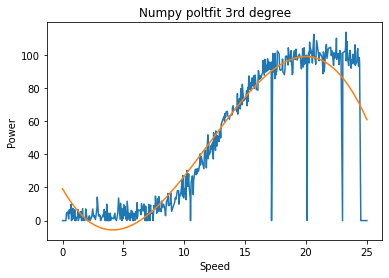

In [25]:
plt.plot(x, y)
plt.plot(x, y_third)
plt.title('Numpy poltfit 3rd degree')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

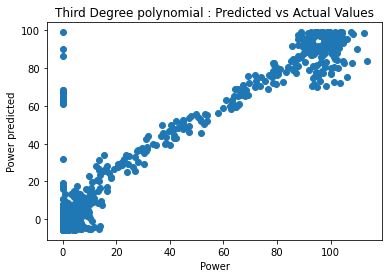

In [26]:
plt.scatter(y, y_third)
plt.xlabel('Power')
plt.ylabel('Power predicted')
plt.title('Third Degree polynomial : Predicted vs Actual Values')
plt.show()

This relationship appears to be a better fit than the linear model. However the 3rd degree plotfit predictions are not accurate when the wind speed is greater than 20